Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3999 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1053s 8s/step - accuracy: 0.1096 - loss: 2.4950 - val_accuracy: 0.1990 - val_loss: 2.2367
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1008s 8s/step - accuracy: 0.1234 - loss: 2.3096 - val_accuracy: 0.1940 - val_loss: 2.1798
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 986s 8s/step - accuracy: 0.1744 - loss: 2.2402 - val_accuracy: 0.2010 - val_loss: 2.1478
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 986s 8s/step - accuracy: 0.1796 - loss: 2.2082 - val_accuracy: 0.3070 - val_loss: 2.1231
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1020s 8s/step - accuracy: 0.2003 - loss: 2.1682 - val_accuracy: 0.2550 - val_loss: 2.1092



✅ Modelo guardado en: /content/drive/MyDrive/Big_Data/Proyecto_final/Modelos_entrenados/ResNet50_tomato_model_frac.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 195s 6s/step


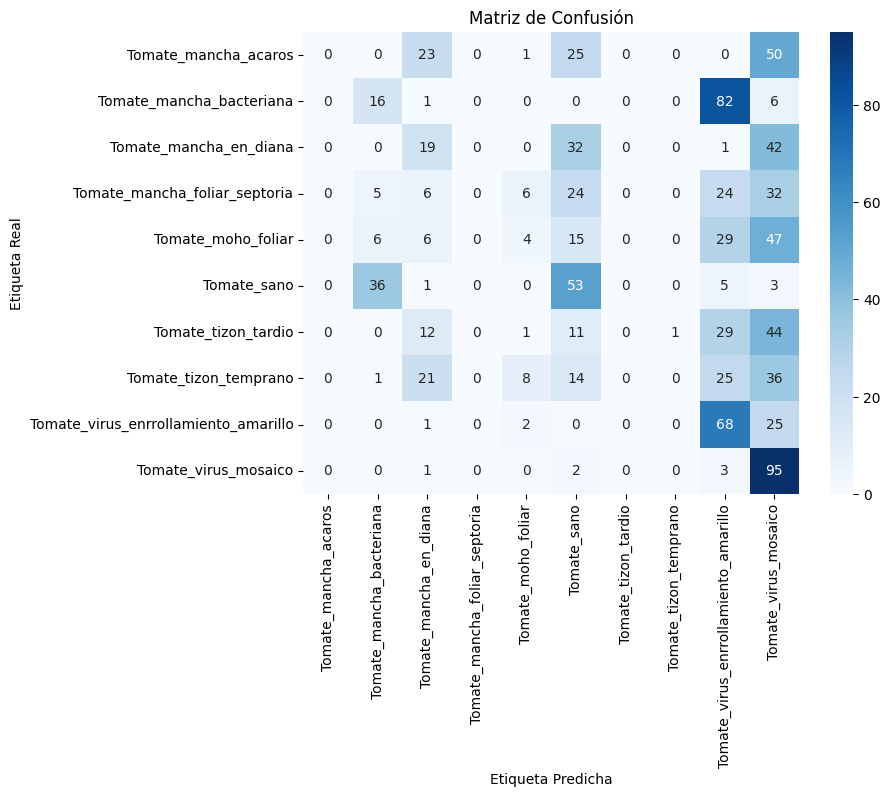


📋 Reporte de Clasificación:
                                      precision    recall  f1-score   support

                Tomate_mancha_acaros       0.00      0.00      0.00        99
            Tomate_mancha_bacteriana       0.25      0.15      0.19       105
              Tomate_mancha_en_diana       0.21      0.20      0.21        94
       Tomate_mancha_foliar_septoria       0.00      0.00      0.00        97
                  Tomate_moho_foliar       0.18      0.04      0.06       107
                         Tomate_sano       0.30      0.54      0.39        98
                 Tomate_tizon_tardio       0.00      0.00      0.00        98
               Tomate_tizon_temprano       0.00      0.00      0.00       105
Tomate_virus_enrrollamiento_amarillo       0.26      0.71      0.38        96
                Tomate_virus_mosaico       0.25      0.94      0.40       101

                            accuracy                           0.26      1000
                           macro 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from PIL import Image

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5
FRACTION = 0.5  # usar fracción del dataset

drive.mount('/content/drive')

# === Rutas ===
train_dir = '/content/drive/MyDrive/Big_Data/Proyecto_final/tomato/train'
modelo_guardado = '/content/drive/MyDrive/Big_Data/Proyecto_final/Modelos_entrenados/ResNet50_tomato_model_frac.h5'

#normalización
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

all_images = glob.glob(os.path.join(train_dir, '*/*.jpg'))
labels = [os.path.basename(os.path.dirname(path)) for path in all_images]
df = pd.DataFrame({'filename': all_images, 'class': labels})

#Usar solo una fracción del dataset
df_sampled = df.sample(frac=FRACTION, random_state=42)

#Filtrar imágenes inválidas
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.verify()
        return True
    except Exception:
        return False

df_sampled['valid'] = df_sampled['filename'].apply(is_valid_image)
df_sampled = df_sampled[df_sampled['valid']].drop(columns='valid')

df_train, df_val = train_test_split(df_sampled, test_size=0.2, stratify=df_sampled['class'], random_state=42)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filename',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='filename',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Modelo ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#Entrenamiento
history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS)

model.save(modelo_guardado)
print(f"\n Modelo guardado en: {modelo_guardado}")

# Evaluación
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

print("\n Reporte de Clasificación:")
print(classification_report(y_true, y_pred, target_names=labels))
